In [654]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
import sklearn

In [655]:
df = pd.read_csv('2018_public_use_data.csv')
print(df.shape)
df.dtypes

(6436, 1181)


PUBID      int64
REGION     int64
CENDIV     int64
PBA        int64
SQFT       int64
           ...  
ZTINT      int64
ZREFL      int64
ZAWN       int64
ZSKYLT     int64
ZDAYLTP    int64
Length: 1181, dtype: object

In [656]:
df.sample(5)

,PUBID,REGION,CENDIV,PBA,SQFT,SQFTC,WLCNS,RFCNS,RFCOOL,RFTILT,...,ZLTEXPC,ZPKLT,ZPKLTINOUT,ZPKLTN,ZWINTYP,ZTINT,ZREFL,ZAWN,ZSKYLT,ZDAYLTP
903,904,4,9,25,205000,8,1,1,1,2,...,0,0,0,0,0,0,0,0,0,0
5559,5560,3,5,18,200000,7,3,6,1,1,...,0,0,0,1,1,1,1,1,1,1
3136,3137,3,6,1,300000,8,4,5,1,3,...,0,0,9,9,0,9,9,9,9,9
2545,2546,3,5,25,2300,2,3,7,1,1,...,0,0,0,0,0,0,0,0,0,0
3196,3197,3,7,14,170000,7,2,1,2,1,...,0,0,0,0,0,0,0,0,0,0


In [657]:
df_codebook = pd.read_csv('2018cbecs_codebook_wDicts.csv')
df_codebook.head()

,category,file_order,col_name,col_type,length,col_description,codes,codes_dict
0,0,1,PUBID,Char,5,Public use file building identifier,00001 - 06436,{'00001 - 06436': 'continuous numerical range'}
1,0,2,REGION,Char,1,Census Region,1=Northeast\n2=Midwest\n3=South\n4=West,"{'1': 'Northeast', '2': 'Midwest', '3': 'South..."
2,0,3,CENDIV,Char,1,Census division,1=New England\n2=Middle Atlantic \n3=East Nor...,"{'1': 'New England', '2': 'Middle Atlantic', '..."
3,0,4,PBA,Num,8,Principal building activity,1=Vacant\n2=Office\n4=Laboratory\n5=Nonrefrige...,"{'1': 'Vacant', '2': 'Office', '4': 'Laborator..."
4,1,5,SQFT,Num,8,Square footage,"1,001 - 2,100,000","{'1,001 - 2,100,000': 'continuous numerical ra..."


In [658]:
print(df_codebook.category.unique())

[0 1 2 3 4 5 6 7]


In [659]:
df_codebook_2012 = pd.read_csv('2012cbecs_codebook_wDicts.csv')
df_codebook_2012.head()

,category,file_order,col_name,col_type,length,format,col_description,codes,codes_dict
0,0,1.0,PUBID,Char,5.0,NaN,Building identifier,00001 - 06720,{'00001 - 06720': 'continuous numerical range'}
1,0,2.0,REGION,Char,1.0,$REGION.,Census region,'1' = 'Northeast'\r\n'2' = 'Midwest'\r\n'3' = ...,"{'1': 'Northeast', '2': 'Midwest', '3': 'South..."
2,0,3.0,CENDIV,Char,1.0,$CENDIV.,Census division,'1' = 'New England'\r\n'2' = 'Middle Atlantic'...,"{'1': 'New England', '2': 'Middle Atlantic', '..."
3,0,4.0,PBA,Char,2.0,$PBA.,Principal building activity,'01' = 'Vacant'\r\n'02' = 'Office'\r\n'04' = '...,"{'01': 'Vacant', '02': 'Office', '04': 'Labora..."
4,1,5.0,FREESTN,Char,1.0,$YES.,Freestanding building,1' = 'Yes'\r\nMissing='No',"{'1': 'Yes', 'Missing': 'No'}"


In [660]:
col_name_2012 = df_codebook_2012.col_name.values.tolist()
col_name_2018 = df_codebook.col_name.values.tolist()

In [661]:
keep_var = df_codebook[df_codebook['col_name'].isin(col_name_2012)]
keep_var.shape

## 330 overlapping variables 

(330, 8)

In [662]:
keep_var_list = keep_var.col_name.values.tolist()

In [663]:
## Read 2012 Data

df_2012 = pd.read_csv('2012cbecs_train-data.csv')
df_2012_cons = pd.read_csv('2012cbecs_consumption-data.csv')

In [664]:
df_2012.sample(5)

,PUBID,REGION,CENDIV,PBA,SQFT,NFLOOR,BASEMNT,FLCEILHT,NELVTR,NESLTR,...,TRIM,PLGCTRL,DRLGHT,LTEXPC,PKLT,WINTYP,TINT,REFL,AWN,SKYLT
4678,4679,3,5,15,4800,1,0.0,12,0.0,0.0,...,0.0,0.0,0.0,3.0,1.0,2,0.0,0.0,1.0,0.0
6586,6587,4,8,8,9500,1,0.0,8,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,4,0.0,0.0,0.0,0.0
5372,5373,3,5,4,600000,11,3.0,18,9.0,0.0,...,0.0,1.0,0.0,4.0,1.0,2,1.0,1.0,0.0,1.0
3179,3180,3,7,24,1400000,1,0.0,12,0.0,0.0,...,0.0,0.0,0.0,4.0,1.0,3,0.0,1.0,1.0,0.0
5895,5896,4,9,2,58000,2,0.0,8,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,3,1.0,0.0,0.0,0.0


In [665]:
df_2012 = df_2012[df_2012.columns.intersection(keep_var_list)]
df_2012.shape

(6720, 330)

In [666]:
df_2012_cons.sample(5)

,HDD65,CDD65,MFHTBTU,MFCLBTU,MFVNBTU,MFWTBTU,MFLTBTU,MFCKBTU,MFRFBTU,MFOFBTU,...,MFUSED,DHUSED,DHHT1,DHHT2,DHCOOL,DHCOOK,DHWATR,DHMANU,DHOTH,PUBCLIM
2166,1132,2561,1554633.0,2238295.0,937456.0,2175455.0,669112.0,648125.0,517005.0,300837.0,...,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1228,5524,1117,2088147.0,0.0,4451746.0,1588853.0,2539074.0,0.0,377711.0,710739.0,...,1,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2174,464,5458,0.0,0.0,574041.0,238022.0,862616.0,0.0,393552.0,1062953.0,...,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1838,5381,792,3607173.0,242709.0,730814.0,114031.0,718858.0,2669090.0,7479919.0,45614.0,...,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2407,5839,1148,51849.0,5271.0,69.0,5.0,0.0,2234.0,1688.0,0.0,...,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [667]:
category_map = {}
for cat in df_codebook.category.unique():
    category_cols_df = df_codebook[df_codebook['category'] == cat]
    cat_cols = []
    for col in category_cols_df.col_name.values:
        if type(col) == str:
            cat_cols.append(col)
    category_map[cat] = cat_cols

In [668]:
keep_cols = []
for wanted_cols in category_map.values():
    for col in wanted_cols:
        keep_cols.append(col)
print(len(keep_cols))

561


In [669]:
def find_num_cat_cols(list_of_dfs, category_num, list_of_numcols, list_of_catcols):
    numeric_cols = []
    categorical_cols = []
    for col in list_of_dfs[category_num].columns:
        if col in list_of_numcols:
            numeric_cols.append(col)
        elif col in list_of_catcols:
            categorical_cols.append(col)
    df_category = list_of_dfs[category_num].copy()[numeric_cols + categorical_cols]
    return df_category, numeric_cols, categorical_cols

In [670]:
def create_new_codebook(codebook, cols):
    new_codebook = dict(codebook.set_index('col_name').loc[cols].codes_dict)
    return new_codebook

In [671]:
def create_replace_map(new_codebook, category_df, return_errors=False):
    replace_map = {}
    error_map = {}
    for col_name, codebook in new_codebook.items():
        try:
            codebook = json.loads(codebook.replace("'", '"'))
        except ValueError as e:
            print(f'JSONDecodeError on column {col_name}')
            error_map[col_name] = (col_name, e)
            codebook = codebook.replace('"', '')
            codebook = json.loads(codebook.replace("'", '"'))
        finally:
            if col_name in category_df.columns:
                for code, code_val in codebook.items():
                    if code == '2' and code_val == 'No':
                        replace_map[col_name] = 2
    
    if return_errors == True:
        return replace_map, error_map
    else:
        return replace_map

In [672]:
def build_hist(column_list):
    figname = 0
    for column in column_list:
        plt.figure(figname)
        sns.set(rc = {'figure.figsize':(2,2)})
        sns.histplot(data=df, x=column, kde=True)
        figname += 1

In [673]:
df = df[keep_cols]
print(df.shape)
df.sample(5)

(6436, 561)


,PUBID,REGION,CENDIV,PBA,SQFT,SQFTC,WLCNS,RFCNS,RFCOOL,RFTILT,...,LTEXPC,PKLT,PKLTINOUT,PKLTN,WINTYP,TINT,REFL,AWN,SKYLT,DAYLTP
1053,1054,3,7,25,124000,7,2,6,1,1,...,2,1,1,500,2,1,2,2,2,15
2017,2018,1,1,13,205000,8,1,2,2,3,...,1,1,3,160,2,1,2,2,1,0
5066,5067,3,5,2,178000,7,1,6,1,1,...,1,1,1,100,2,1,2,2,2,0
1078,1079,1,2,14,102000,7,1,6,1,1,...,3,2,.,5,3,2,2,2,2,50
3299,3300,3,7,23,150000,7,1,1,1,1,...,2,2,.,5,3,1,2,1,2,0


In [674]:
## Adjusting for weird values

df.NFLOOR.replace(to_replace=994, value=10, inplace=True)
df.NFLOOR.replace(to_replace=995, value=15, inplace=True)
df.BASEMNT.replace(to_replace=995, value=5, inplace=True)
df.FLCEILHT.replace(to_replace=995, value=51, inplace=True)
df.NELVTR.replace(to_replace=995, value=31, inplace=True)
df.NESLTR.replace(to_replace=995, value=11, inplace=True)
df.RWSEAT.replace(to_replace=99995, value=2001, inplace=True)
df.PBSEAT.replace(to_replace=999995, value=15001, inplace=True)
df.HCBED.replace(to_replace=9995, value=251, inplace=True)
df.NRSBED.replace(to_replace=9995, value=251, inplace=True)
df.LODGRM.replace(to_replace=99995, value=1001, inplace=True)
df.NOCC.replace(to_replace=996, value=0, inplace=True) 
df.NOCCAT.replace (to_replace=996, value=0, inplace=True) 
df.XRAYN.replace(to_replace=995, value=21, inplace=True)
df.LGOFFDEVN.replace(to_replace=9995, value=501, inplace=True) # new var
df.SMOFFDEVN.replace(to_replace=9995, value=501, inplace=True) # new var
df.WBOARDSN.replace(to_replace=9995, value=201, inplace=True) # new var
df.TVVIDEON.replace(to_replace=995, value=201, inplace=True) 
df.RFGCOMPN.replace(to_replace=9995, value=1001, inplace=True)
df.RFGRSN.replace(to_replace=99995, value=1001, inplace=True)
df.SERVERN.replace(to_replace=9995, value=501, inplace=True)

In [675]:
category_dfs = {}
for cat_name, cat_list in category_map.items():
    category_dfs[cat_name] = df[cat_list]
category_dfs[0].sample(10)

,PUBID,REGION,CENDIV,PBA
124,125,2,3,26
4912,4913,3,5,2
5204,5205,1,1,26
1470,1471,3,7,5
5994,5995,4,8,23
912,913,3,7,5
4717,4718,1,2,2
5008,5009,4,9,14
1209,1210,3,7,2
1260,1261,1,2,14


In [676]:
codebook_check = df_codebook.copy().set_index('col_name')
num_cols = []
cat_cols = []
for col in codebook_check.index:
    if codebook_check.loc[col].col_type == 'Num':
        num_cols.append(col)
    else:
        cat_cols.append(col)
print(len(num_cols))
print(len(cat_cols))

558
3


In [677]:
df = df[df.columns.intersection(keep_var_list)]
df.shape

(6436, 330)

In [678]:
df.sample(5)

,PUBID,REGION,CENDIV,PBA,SQFT,SQFTC,WLCNS,RFCNS,RFCOOL,RFTILT,...,PLGCTRL,DRLGHT,LTEXPC,PKLT,WINTYP,TINT,REFL,AWN,SKYLT,DAYLTP
4107,4108,3,5,2,205000,8,6,1,1,1,...,2,2,4,1,2,2,1,2,2,5
4163,4164,2,3,13,350000,8,1,1,1,1,...,2,2,2,1,3,2,2,1,1,2
5476,5477,2,3,5,73000,6,3,1,2,1,...,2,2,2,2,4,.,.,.,.,.
3290,3291,2,3,5,4500,2,5,5,1,2,...,.,.,3,2,4,.,.,.,.,.
4266,4267,1,2,2,190000,7,1,6,1,1,...,2,2,1,2,2,1,2,1,2,75


Missing Values

In [679]:
df_codebook = create_new_codebook(df_codebook, list(df.columns))
replace_map, error_map = create_replace_map(df_codebook, df, return_errors=True)
print(error_map)

JSONDecodeError on column BLDSHP
JSONDecodeError on column WTHTEQ
{'BLDSHP': ('BLDSHP', JSONDecodeError("Expecting ',' delimiter: line 1 column 127 (char 126)")), 'WTHTEQ': ('WTHTEQ', JSONDecodeError("Expecting ',' delimiter: line 1 column 43 (char 42)"))}


In [680]:
df_filled = df.replace(to_replace=replace_map, value=0).fillna(value=0)
df_filled = df_filled.replace(to_replace='.', value=0)
df_filled[0:20]

,PUBID,REGION,CENDIV,PBA,SQFT,SQFTC,WLCNS,RFCNS,RFCOOL,RFTILT,...,PLGCTRL,DRLGHT,LTEXPC,PKLT,WINTYP,TINT,REFL,AWN,SKYLT,DAYLTP
0,1,3,5,2,210000,8,1,4,0,1,...,2,2,2,1,2,2,2,2,1,0
1,2,4,9,2,28000,5,1,6,1,1,...,2,2,1,1,1,1,1,2,1,15
2,3,3,5,8,2100,2,1,4,0,3,...,2,2,4,1,2,2,2,1,2,40
3,4,3,7,5,240000,8,2,6,1,1,...,2,2,2,1,2,1,2,2,2,5
4,5,1,2,5,295000,8,3,6,0,1,...,2,2,4,1,2,1,2,2,1,0
5,6,3,5,14,94000,6,1,6,1,1,...,2,2,4,1,2,2,2,2,2,20
6,7,4,8,14,41000,5,1,4,1,1,...,2,2,1,1,2,1,2,2,2,75
7,8,2,3,5,122000,7,1,6,1,1,...,1,2,4,1,3,2,2,1,2,0
8,9,4,8,25,96000,6,3,6,1,1,...,2,2,3,1,1,1,2,2,2,40
9,10,1,2,14,220000,8,1,1,0,1,...,2,2,4,1,2,1,2,1,2,10


Training Target 

In [681]:
col_list = ['MFHTBTU',
'MFCLBTU',
'MFVNBTU',
'MFWTBTU',
'MFLTBTU',
'MFCKBTU',
'MFRFBTU',
'MFOFBTU',
'MFPCBTU',
'MFOTBTU',
'ELHTBTU',
'ELCLBTU',
'ELVNBTU',
'ELWTBTU',
'ELLTBTU',
'ELCKBTU',
'ELRFBTU',
'ELOFBTU',
'ELPCBTU',
'ELOTBTU',
'NGHTBTU',
'NGCLBTU',
'NGWTBTU',
'NGCKBTU',
'NGOTBTU',
'FKHTBTU',
'FKCLBTU',
'FKWTBTU',
'FKCKBTU',
'FKOTBTU',
'DHHTBTU',
'DHCLBTU',
'DHWTBTU',
'DHCKBTU',
'DHOTBTU']
y_train = pd.DataFrame(columns=["energy_consumption"])
y_train["energy_consumption"]=(df_2012_cons[col_list].sum(axis=1))
y_train.sample(5)

,energy_consumption
218,1023496.0
6193,16513882.0
4752,8519660.0
4927,117990212.0
1750,534887616.0


In [682]:
train_total = df_2012.join(y_train)
train_total.shape

(6720, 331)

In [683]:
train_total = train_total[train_total.energy_consumption != 0]
train_total.shape

(6554, 331)

In [684]:
X_train1 = train_total.drop(columns=['energy_consumption'])
y_train = pd.DataFrame(train_total['energy_consumption'])

In [685]:
X_train1.shape

(6554, 330)

In [686]:
y_train.shape

(6554, 1)

In [687]:
X_test = df_filled

# PCA

In [688]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

lr = LinearRegression()
scaler_train = StandardScaler()
pca_train = PCA()

X_train = X_train1.to_numpy(dtype=float, copy=True)
X_train_scaled = scaler_train.fit_transform(X_train)
X_train_pca = pca_train.fit_transform(X_train_scaled)

In [689]:
pca_exp_var = pd.DataFrame(pca_train.explained_variance_ratio_,)
pca_exp_var.T

,0,1,2,3,4,5,6,7,8,9,...,320,321,322,323,324,325,326,327,328,329
0,0.104419,0.030132,0.023229,0.021101,0.018969,0.017866,0.016023,0.015817,0.014971,0.013387,...,5.345760e-34,5.345760e-34,5.345760e-34,5.345760e-34,5.345760e-34,5.345760e-34,5.345760e-34,5.345760e-34,5.345760e-34,1.184227e-34


In [690]:
# plt.figure(figsize=(5,5))
# plt.plot(np.cumsum(pca_train.explained_variance_ratio_))
# plt.xlabel('num components')
# plt.ylabel('cumulative explained variance')

<AxesSubplot:xlabel='0', ylabel='1'>

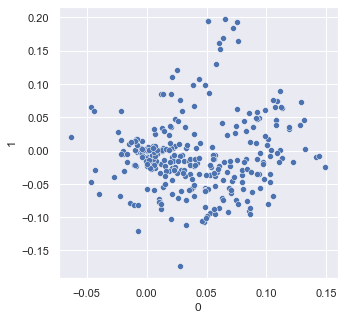

In [691]:
pca_train_df = pd.DataFrame(pca_train.components_)
sns.set(rc = {'figure.figsize':(5,5)})
sns.scatterplot(x=pca_train_df.T[0], y=pca_train_df.T[1])

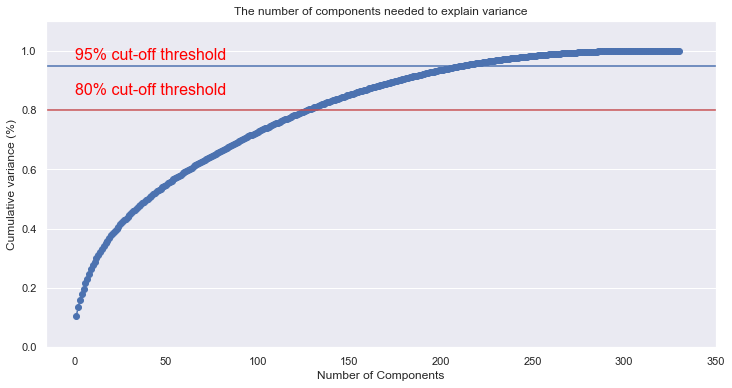

In [692]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 331, step=1)
y = np.cumsum(pca_train.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 400, step=50)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.80, color='r', linestyle='-')
plt.text(0.5, 0.85, '80% cut-off threshold', color = 'red', fontsize=16)

plt.axhline(y=0.95, color='b', linestyle='-')
plt.text(0.5, 0.97, '95% cut-off threshold', color = 'red', fontsize=16)


ax.grid(axis='x')
plt.show()

# https://www.kaggle.com/code/kushal1506/deciding-n-components-in-pca/notebook

In [693]:
pca_final = PCA(n_components = 200) # INSERT NUMBER OF COMPONENTS
X_train_pca = pca_final.fit_transform(X_train_scaled)

In [694]:
X_train_pca.shape

(6554, 200)

In [695]:
# pca_exp_var = pd.DataFrame(pca_final.explained_variance_ratio_,)
# pca_exp_var.T

In [696]:
## PCA on 2018 data

X_test = X_test.to_numpy(dtype=float, copy=True)
X_test_scaled = scaler_train.transform(X_test)
X_test_pca = pca_final.transform(X_test_scaled)

In [697]:
X_test_pca.shape

(6436, 200)

In [698]:
y_train_final = np.log(y_train)

In [699]:
y_train_final.describe()

,energy_consumption
count,6554.000000
mean,14.940004
std,2.366246
min,1.791759
25%,13.192421
50%,14.833817
75%,16.644452
max,21.809715


In [700]:
X_train_pca.shape

(6554, 200)

In [747]:
model = lr.fit(X_train_pca, y_train_final)
y_pred = model.predict(X_test_pca)

In [753]:
y_pred.shape

(6436, 1)

In [752]:
predicted

,predicted
0,60.768417
1,10.980625
2,31.517218
3,3.006339
4,27.318156
...,...
6431,-12.857048
6432,13.098349
6433,112.786931
6434,24.877701


In [758]:
predicted[predicted['predicted'] >= np.mean(predicted.values)]

,predicted
19,631.113161
28,225.495344
30,189.652314
31,161.297251
43,317.516450
...,...
6382,721.740310
6398,231.655554
6399,142.332102
6410,581.258583


In [762]:
predicted[predicted['predicted'] <= 0].shape

(1297, 1)

In [757]:
predicted.describe()

,predicted
count,6436.000000
mean,128.200442
std,1756.810767
min,-2789.022495
25%,5.399678
50%,23.305809
75%,42.288997
max,36149.716421


<AxesSubplot:ylabel='Count'>

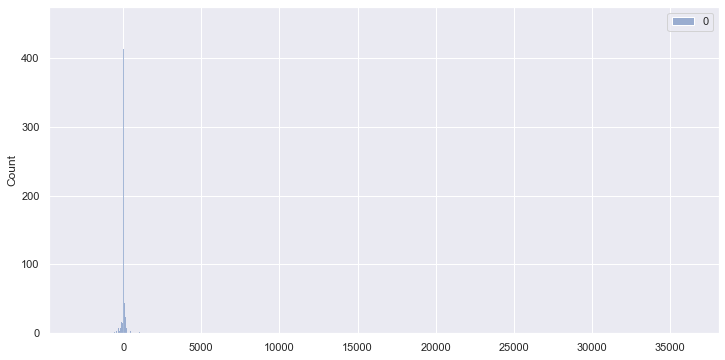

In [732]:
sns.histplot(data=y_pred)

In [711]:
y_train_final.reset_index(inplace=True, drop=True)

In [712]:
testing = model.predict(X_train_pca)

In [713]:
testing = pd.DataFrame(testing)

In [714]:
testing

,0
0,11.401537
1,16.387253
2,11.853877
3,19.042302
4,16.530811
...,...
6549,16.938957
6550,11.367793
6551,12.844861
6552,14.242846


In [715]:
y_train_final.shape

(6554, 1)

In [722]:
df1=pd.concat([y_train_final,testing],axis=1,join='inner').rename(columns={'energy_consumption': 'original', 0:'predicted'})
df1

,original,predicted
0,10.894292,11.401537
1,16.281858,16.387253
2,11.261717,11.853877
3,18.388926,19.042302
4,15.159338,16.530811
...,...,...
6549,16.526452,16.938957
6550,8.839277,11.367793
6551,13.775151,12.844861
6552,14.833772,14.242846


In [723]:
df1['residual']= df1['original'] - df1['predicted']
df1

,original,predicted,residual
0,10.894292,11.401537,-0.507245
1,16.281858,16.387253,-0.105395
2,11.261717,11.853877,-0.592160
3,18.388926,19.042302,-0.653376
4,15.159338,16.530811,-1.371473
...,...,...,...
6549,16.526452,16.938957,-0.412505
6550,8.839277,11.367793,-2.528516
6551,13.775151,12.844861,0.930290
6552,14.833772,14.242846,0.590926


<AxesSubplot:xlabel='predicted', ylabel='residual'>

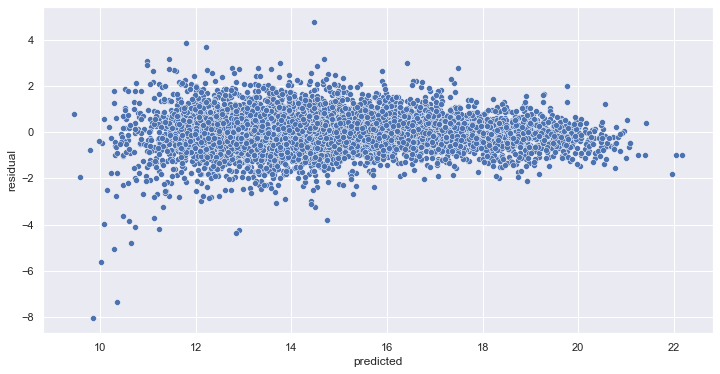

In [726]:
sns.scatterplot(data=df1, x="predicted", y="residual")

In [727]:
lr.score(X_train_pca, y_train_final)

0.8812643748770498